In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('C:/Users/maity/OneDrive/Desktop/xyz/creditfraud.csv', index_col=0)

In [4]:
dataset = data.copy()

In [5]:
dataset.head()

,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2,29,59,3,0
1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,4,52,8,0
2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,26,52,8,0
4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1,38,52,8,0


In [6]:
print("Rows  :", dataset.shape[0])
print("Columns  :", dataset.shape[1])

Rows  : 25134
Columns  : 19


In [7]:
dataset.isna().sum()

ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64

In [8]:
dataset.dtypes

ID                  int64
GENDER             object
CAR                object
REALITY            object
NO_OF_CHILD         int64
INCOME            float64
INCOME_TYPE        object
EDUCATION_TYPE     object
FAMILY_TYPE        object
HOUSE_TYPE         object
FLAG_MOBIL          int64
WORK_PHONE          int64
PHONE               int64
E_MAIL              int64
FAMILY SIZE         int64
BEGIN_MONTH         int64
AGE                 int64
YEARS_EMPLOYED      int64
TARGET              int64
dtype: object

In [9]:
dataset.nunique()

ID                25134
GENDER                2
CAR                   2
REALITY               2
NO_OF_CHILD           9
INCOME              195
INCOME_TYPE           5
EDUCATION_TYPE        5
FAMILY_TYPE           5
HOUSE_TYPE            6
FLAG_MOBIL            1
WORK_PHONE            2
PHONE                 2
E_MAIL                2
FAMILY SIZE          10
BEGIN_MONTH          61
AGE                  47
YEARS_EMPLOYED       43
TARGET                2
dtype: int64

0    0.98321
1    0.01679
Name: TARGET, dtype: float64


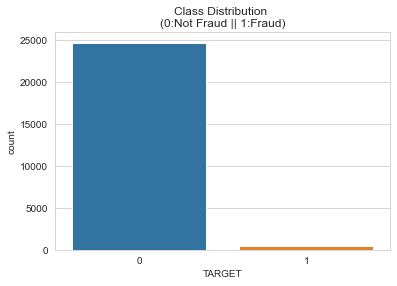

In [11]:
sns.countplot(dataset.TARGET).set_title("Class Distribution \n(0:Not Fraud || 1:Fraud)")
print(dataset.TARGET.value_counts(normalize= True))
plt.show()

Not Frauds : 0    98.32
1     1.68
Name: TARGET, dtype: float64 % of the dataset
Frauds : 1.68 % of the dataset


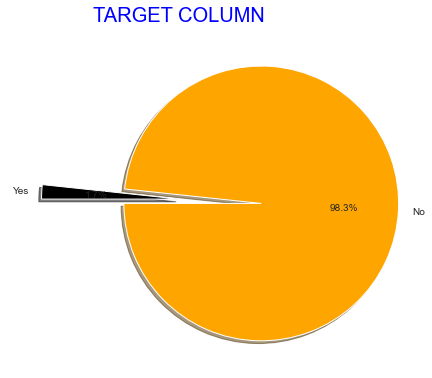

In [14]:
labels = ['No' , 'Yes']
data = dataset['TARGET'].value_counts(sort=True)
colours = ['Orange', 'black']
explode = (0.6,0)
plt.figure(figsize=(6,6))
plt.pie(data,colors = colours,shadow =True,startangle=180
        ,autopct="%1.1f%%",explode=explode,labels=labels)
plt.title("TARGET COLUMN", fontsize=20,color="b")
plt.tight_layout()

print('Not Frauds :', round(dataset['TARGET'].value_counts()/len(dataset) * 100,2), '% of the dataset')
print('Frauds :', round(dataset['TARGET'].value_counts()[1]/len(dataset) * 100,2), '% of the dataset')

In [15]:
dataset.describe()

,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


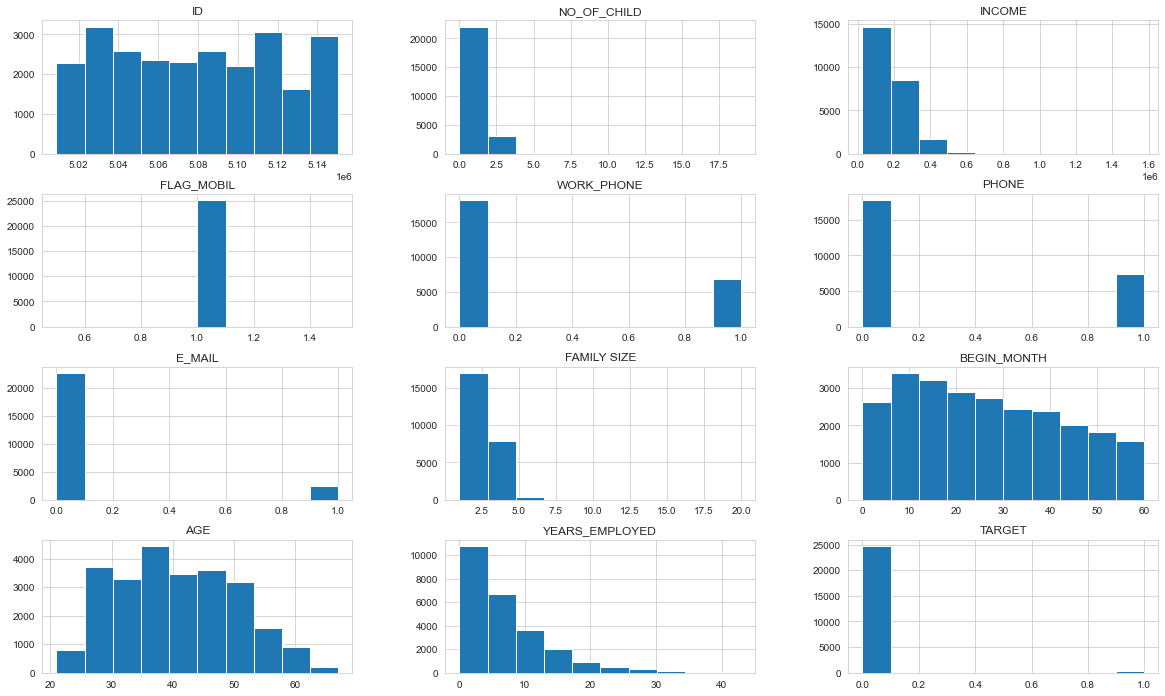

In [16]:
dataset.hist(figsize=(20,12))
plt.show()

In [20]:
dataset.describe(include="O")

,GENDER,CAR,REALITY,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE
count,25134,25134,25134,25134,25134,25134,25134
unique,2,2,2,5,5,5,6
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment
freq,15630,14618,16461,15622,16808,17509,22102


In [21]:
cols=dataset.describe(include="O").columns
for i in cols:
    print("Distinct_values : \n 'column_name' =",i)
    print(dataset[i].unique())
    print()

Distinct_values : 
 'column_name' = GENDER
['M' 'F']

Distinct_values : 
 'column_name' = CAR
['Y' 'N']

Distinct_values : 
 'column_name' = REALITY
['Y' 'N']

Distinct_values : 
 'column_name' = INCOME_TYPE
['Working' 'Commercial associate' 'State servant' 'Student' 'Pensioner']

Distinct_values : 
 'column_name' = EDUCATION_TYPE
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Distinct_values : 
 'column_name' = FAMILY_TYPE
['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']

Distinct_values : 
 'column_name' = HOUSE_TYPE
['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']



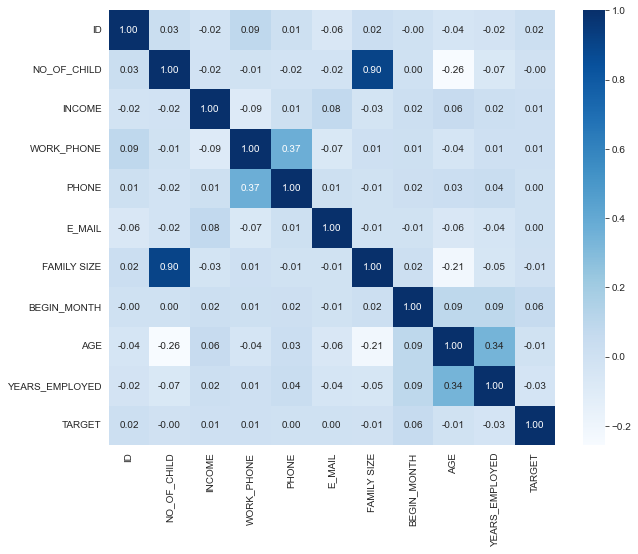

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.drop("FLAG_MOBIL",axis=1).corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

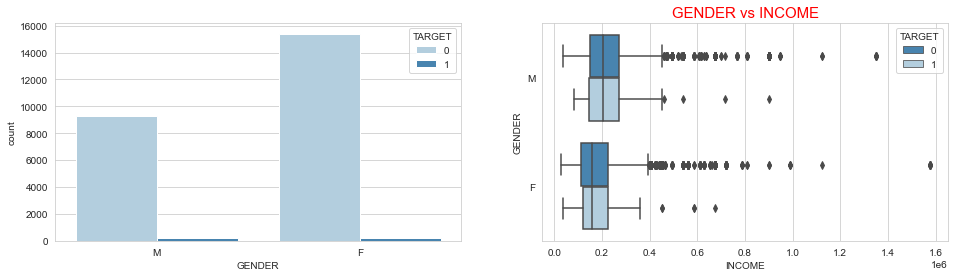

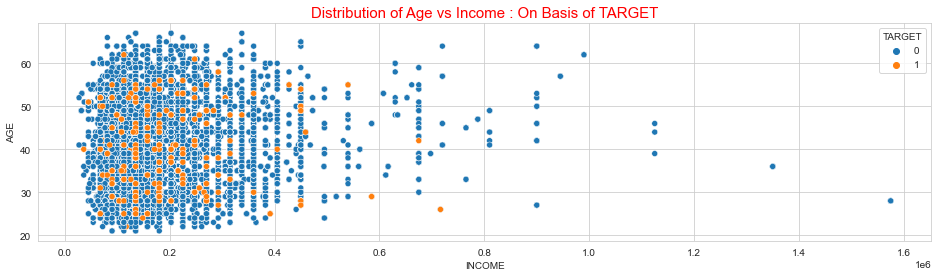

In [25]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(dataset["GENDER"],hue="TARGET",data=dataset,palette="Blues")
plt.subplot(122)
sns.boxplot(x="INCOME",y="GENDER",hue="TARGET",data=dataset,palette="Blues_r")
plt.title("GENDER vs INCOME", fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(dataset["INCOME"], dataset["AGE"],hue=dataset["TARGET"])
plt.title("Distribution of Age vs Income : On Basis of TARGET",fontsize=15,color="Red")
plt.show()

<AxesSubplot:xlabel='INCOME_TYPE', ylabel='count'>

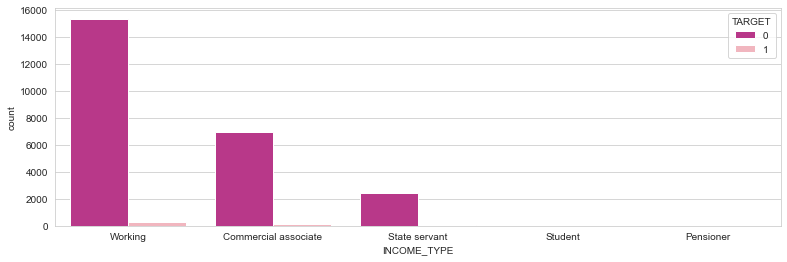

In [26]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["INCOME_TYPE"],hue="TARGET",data=dataset,palette="RdPu_r")

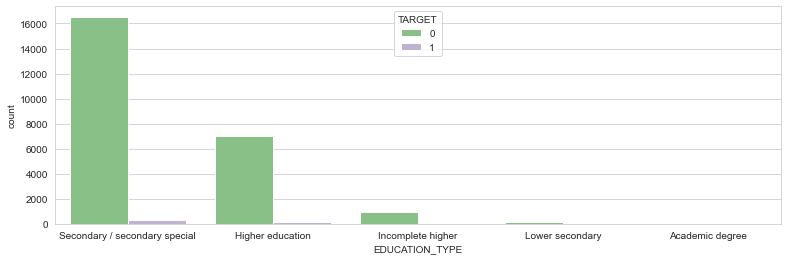

In [27]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["EDUCATION_TYPE"],hue="TARGET",data=dataset,palette="Accent")
plt.show()

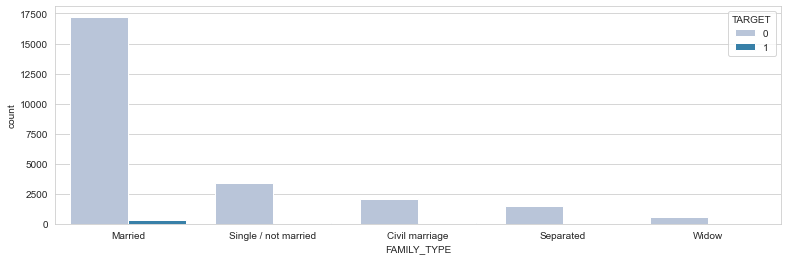

In [28]:
plt.figure(figsize=(13,4))
sns.countplot(dataset["FAMILY_TYPE"],hue="TARGET",data=dataset,palette="PuBu")
plt.show()

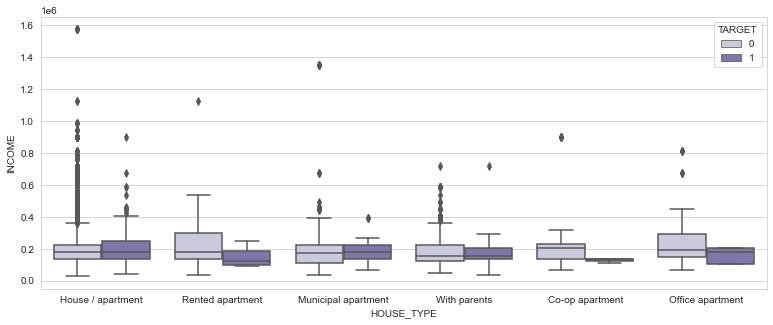

In [29]:
plt.figure(figsize=(13,5))
sns.boxplot(x="HOUSE_TYPE",y="INCOME",data=dataset,hue="TARGET",palette="Purples")
plt.show()

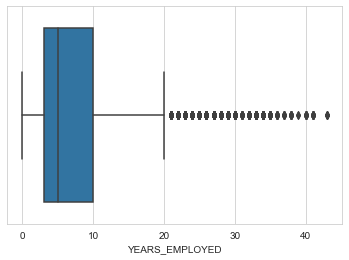

In [30]:
sns.boxplot(dataset["YEARS_EMPLOYED"])
plt.show()

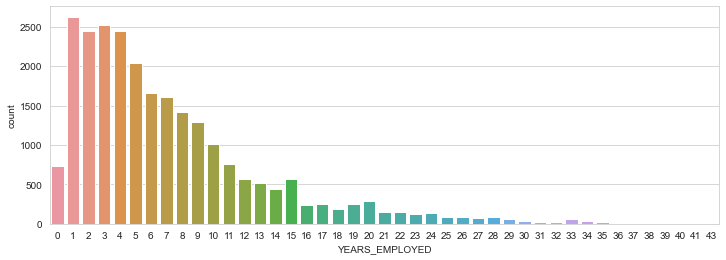

In [31]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"])
plt.show()

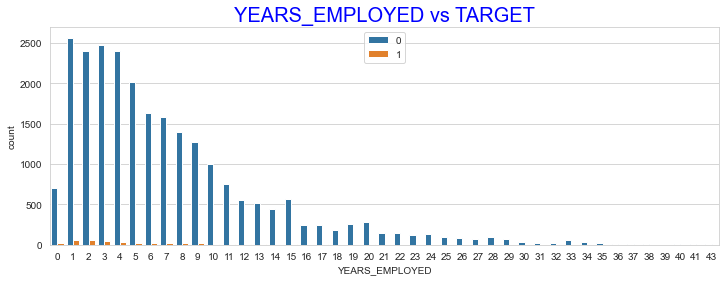

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(dataset["YEARS_EMPLOYED"],hue="TARGET",data=dataset)
plt.title("YEARS_EMPLOYED vs TARGET",fontsize=20,color="BLUE")
plt.legend()
plt.show()

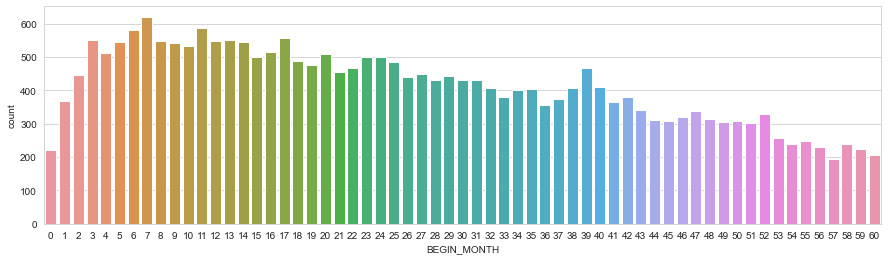

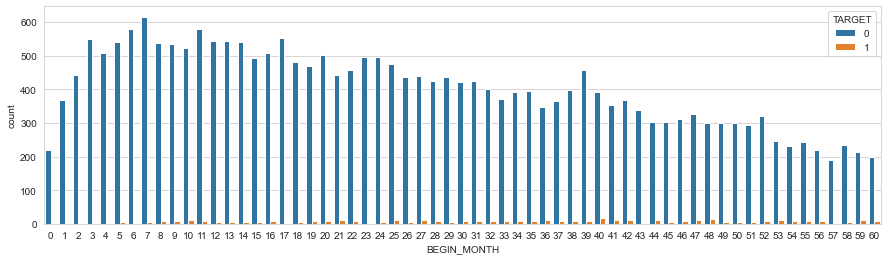

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"])
plt.figure(figsize=(15,4))
sns.countplot(dataset["BEGIN_MONTH"],hue="TARGET",data=dataset)
plt.show()

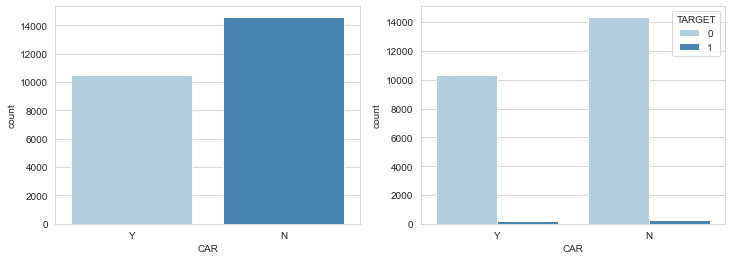

In [35]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.countplot(dataset["CAR"], palette="Blues")
plt.subplot(122)
sns.countplot(dataset.CAR,hue="TARGET" ,data=dataset,palette="Blues")
plt.show()

In [36]:
cont=dataset[["INCOME","BEGIN_MONTH","AGE","YEARS_EMPLOYED"]]

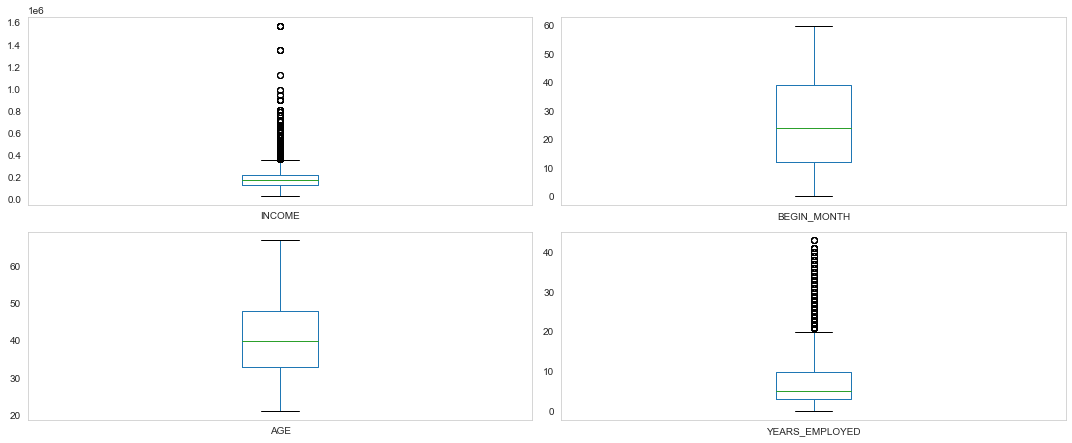

In [37]:
plt.figure(figsize=(15,12))
for i , col in enumerate(list(cont.columns)):
    plt.subplot(4,2,i+1)
    cont.boxplot(col)
    plt.grid()
    plt.tight_layout()

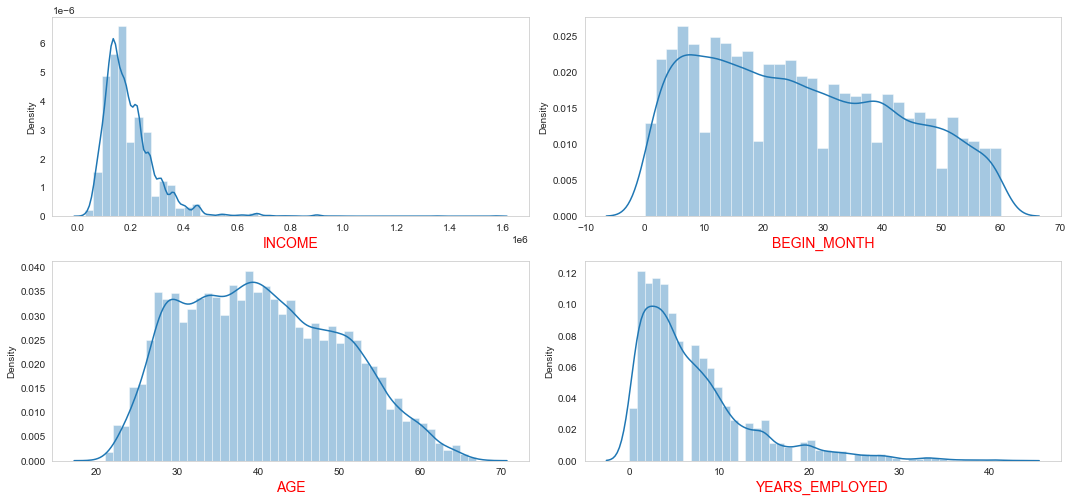

In [38]:
plt.figure(figsize=(15,10))
for i,cols in enumerate(list(cont.columns)):
    plt.subplot(3,2,i+1)
    sns.distplot(cont[cols])
    plt.xlabel(cols,fontsize=14,color="Red")
    plt.grid()
    plt.tight_layout()

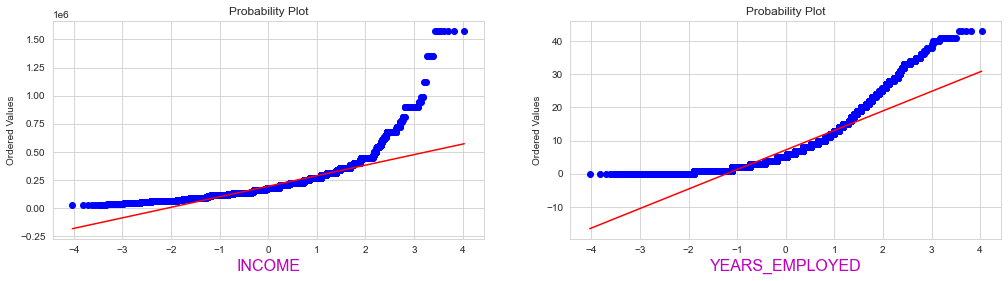

In [39]:
plt.figure(figsize=(17,4))
plt.subplot(121)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")
plt.xlabel("INCOME",fontsize=16,color="m")
plt.subplot(122)
res=stats.probplot(dataset.YEARS_EMPLOYED,plot=plt,dist="norm")
plt.xlabel("YEARS_EMPLOYED",fontsize=16,color="m")
plt.show()

In [40]:
dataset=dataset[dataset['INCOME']< 600000]

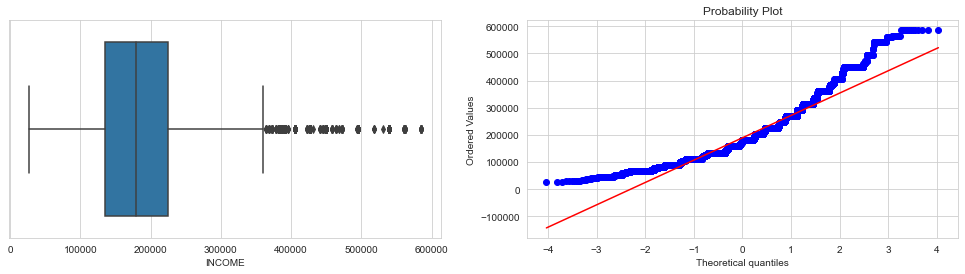

In [41]:
plt.figure(figsize=(17,4))
plt.subplot(121)
sns.boxplot(dataset.INCOME)
plt.subplot(122)
res=stats.probplot(dataset.INCOME,plot=plt,dist="norm")

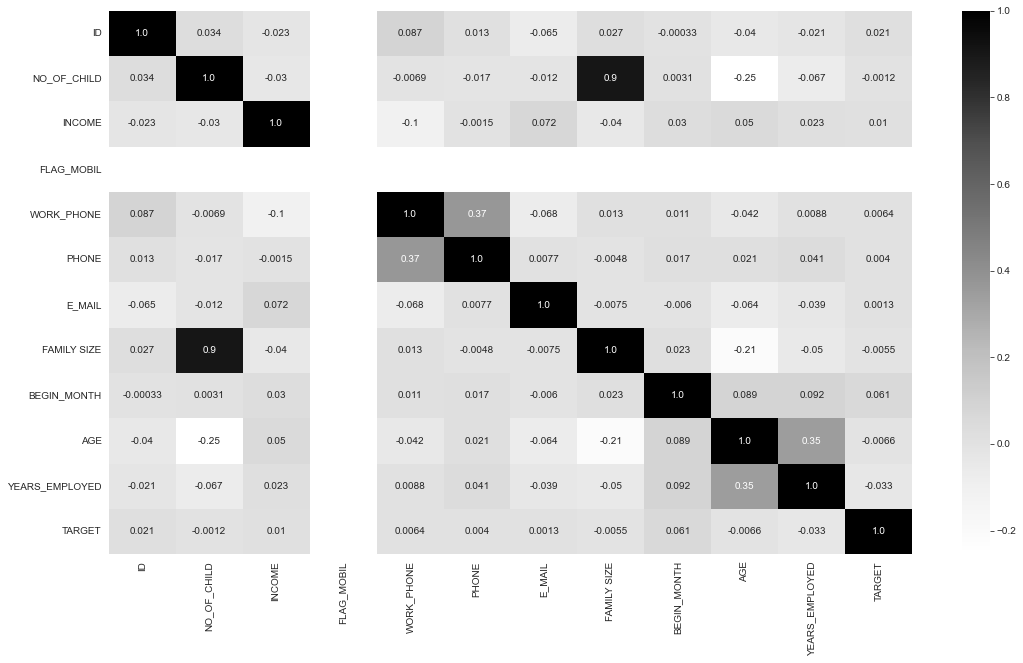

In [42]:
plt.figure(figsize=(18,10))
sns.heatmap(dataset.corr(), annot=True,fmt='.2',cmap="Greys")
plt.show()